In [1]:
#using POMDPs
using Plots
using DifferentialEquations
using DataStructures

In [2]:
#Global Variables
plot_size = 800; #number of pixels
cart_size = 1; # radius in meters

In [3]:
struct goal_location
    x::Float64
    y::Float64
    id::Float64
end

mutable struct human_state
    x::Float64
    y::Float64
    v::Float64
    goal::goal_location
end

struct obstacle_location
    x::Float64
    y::Float64
    r::Float64 #Radius of the obstacle which is assumed to be a circle
end

mutable struct cart_state
    x::Float64
    y::Float64
    theta::Float64
    v::Float64
    L::Float64
    goal::goal_location
end

In [4]:
mutable struct experiment_environment 
    length::Float64
    breadth::Float64
    num_humans::Float64
    goals::Array{goal_location}
    humans::Array{human_state}
    obstacles::Array{obstacle_location}
    cart::cart_state
end

In [5]:
function Base.show(io::IO, mime::MIME, env::experiment_environment)
    
    #Plot Boundaries
    p = plot([0.0],[0.0],legend=false,grid=false)
    plot!([env.length], [env.breadth],legend=false)
    
    #Plot Humans
    for i in 1: length(env.humans)
        scatter!([env.humans[i].x], [env.humans[i].y],color="red",msize=plot_size/env.length)
    end
    
    #Plot Obstacles
    for i in 1: length(env.obstacles)
        scatter!([env.obstacles[i].x], [env.obstacles[i].y],color="black",shape=:circle,msize=plot_size*env.obstacles[i].r/env.length)
    end
    
    #Plot Golfcart
    scatter!([env.cart.x], [env.cart.y], shape=:sq, color="blue", msize= plot_size*cart_size/env.length)
    
    plot!(size=(plot_size,plot_size))
    show(io, mime, p)
end

In [6]:
g1 = goal_location(0,0,1)
g2 = goal_location(0,100,2)
g3 = goal_location(0,30,3)
g4 = goal_location(14,1,4)
cart_goal = goal_location(100,50,5)
all_goals_list = [g1,g2,g3,g4]

h1 = human_state(40,30,0.5,g3)
h2 = human_state(3,22,0.5,g4)
h3 = human_state(71,22,0.5,g2)
h4 = human_state(12,84,0.5,g1)
human_state_start_list = [h1,h2,h3,h4]

o1 = obstacle_location(50,50,3)
o2 = obstacle_location(33,69,5)
o3 = obstacle_location(73,79,3)
all_obstacle_list = [o1,o2,o3]

golfcart = cart_state(0,50,0,1,1,cart_goal)


cart_state(0.0, 50.0, 0.0, 1.0, 1.0, goal_location(100.0, 50.0, 5.0))

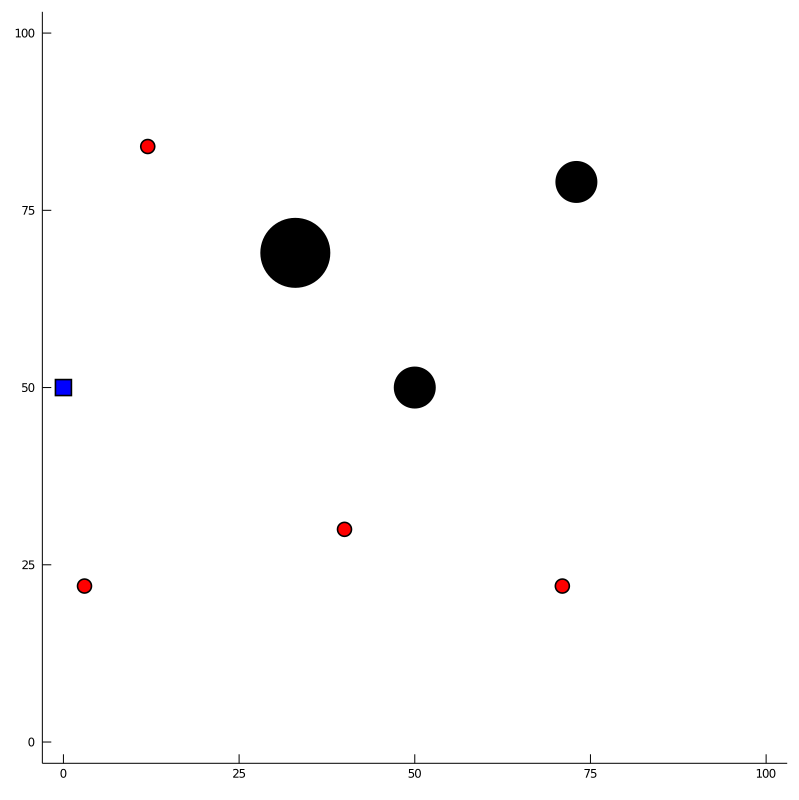

In [7]:
env = experiment_environment(100,100,4,all_goals_list,human_state_start_list,all_obstacle_list,golfcart)

In [8]:
#Integration

function travel!(du,u,p,t)
    x,y,theta = u
    v,L,alpha = p 
    
    du[1] = v*cos(theta)
    du[2] = v*sin(theta)
    du[3] = (v/L)*tan(alpha)
end

function get_intermediate_points(initial_state, time_interval, extra_parameters)
    prob = ODEProblem(travel!,initial_state,time_interval,extra_parameters)
    sol = solve(prob,saveat=0.1)
    x = []
    y = []
    theta = []
    
    for i in 1:length(sol.u)
        push!(x,sol.u[i][1])
        push!(y,sol.u[i][2])
        push!(theta,sol.u[i][3])
    end
    
    return x,y,theta
end

get_intermediate_points (generic function with 1 method)

In [11]:
x_init = 0.0;
y_init = 50.0;
theta_init = 0.0;
cart_current_speed = 1.0
cart_length = 1.0
steering_angle = -pi/10

-0.3141592653589793

In [12]:
initial_state = [x_init,y_init,theta_init]
extra_parameters = [cart_current_speed, cart_length, steering_angle]
time_interval = (0.0,1.0)
x,y,theta = get_intermediate_points(initial_state, time_interval, extra_parameters);

In [13]:
x

11-element Array{Any,1}:
 0.0                
 0.09998240545971543
 0.1998592954314681 
 0.29952518279617013
 0.3988748356343839 
 0.4978034376875057 
 0.5962065885954635 
 0.6939803499022335 
 0.7910215092701427 
 0.8872276326156991 
 0.9824971788591049 

In [68]:
# x_init = 0.0;
# y_init = 50.0;
# theta_init = 0.0;
# cart_current_speed = 1.0
# cart_length = 1.0
# time_interval = (0.0,1.0)

# initial_state = [x_init,y_init,theta_init]

# lala_path = [10,20,30,40,50,60]

# anim = @animate for i ∈ 1:length(lala_path)
#         env.cart.x = lala_path[i]
#         env.cart.y = lala_path[i]
#         display(env);
# end
# gif(anim, "anim_fps15.gif", fps = 1)

In [78]:
# x_init = 0.0;
# y_init = 50.0;
# theta_init = 0.0;
# cart_current_speed = 1.0
# cart_length = 1.0
# time_interval = (0.0,1.0)

# initial_state = [x_init,y_init,theta_init]



# anim = @animate for i ∈ 1:length(path_x)
#     #@show(initial_state)
#     env.cart.x = path_x[i]
#     env.cart.y = path_y[i]
#     display(env);
# end
# gif(anim, "paths.gif", fps = 1000)

In [14]:
mutable struct graph_node
    x::Float64
    y::Float64
    theta::Float64
    actual_cost::Float64
    heuristic_cost::Float64
    action_taken_to_reach_here::Float64
    discrete_x::Float64
    discrete_y::Float64
    discrete_theta::Float64
    parent::Any
end

null_graph_node = graph_node(-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,nothing)

graph_node(-Inf, -Inf, -Inf, -Inf, -Inf, -Inf, -Inf, -Inf, -Inf, nothing)

In [21]:
function hybrid_a_star_search(start_x, start_y, start_theta, goal_x, goal_y, env)
    
    #Action Set
    #set_of_steering_angles = [0,-15,15,-30,30]
    set_of_steering_angles = [0,-pi/12,pi/12,-pi/30,pi/30]
    #delta_t = 1 second
    time_step = 1
    #Radius of circle around goal = 1m
    radius_around_goal_threshold = 1
    #Obstacle collision threshold
    obstacle_collision_threshold = 10
    #Human collision threshold
    human_collision_threshold = 10
        
    function is_goal(node, goal_x, goal_y, threshold)
        euclidean_distance =  ( (node.x - goal_x)^2 + (node.y - goal_y)^2 )^ 0.5
        if(euclidean_distance < threshold)
            @show(node.x,node.y)
            return true
        else
            return false
        end
    end
    
    function calculate_heuristic_cost(node_x, node_y, goal_x, goal_y)
        euclidean_distance =  ( (node_x - goal_x)^2 + (node_y - goal_y)^2 )^ 0.5
        return euclidean_distance
    end
    
    function get_path(current_node)
        steering_angle_controls_sequence = [] 
        while(current_node!= nothing)
            push!(steering_angle_controls_sequence, current_node.action_taken_to_reach_here)
            @show(current_node.x,current_node.y)
            @show("*****************")
            current_node = current_node.parent
        end
        return reverse(steering_angle_controls_sequence)
    end     
    
    function get_action_cost(environment, final_x, final_y, discrete_x, discrete_y, obs_thresold, hum_threshold, action)
        total_cost = 0
        
        #Cost from obstacles
        for obstacle in environment.obstacles
            euclidean_distance = ( (final_x - obstacle.x)^2 + (final_y - obstacle.y)^2 )^ 0.5
            if(euclidean_distance >= obstacle.r + 2)
                continue
            elseif(euclidean_distance <= obstacle.r)
                total_cost = Inf
            else
                distance_between_cart_and_obstacle = euclidean_distance - obstacle.r
                total_cost += obs_thresold* (2 - distance_between_cart_and_obstacle) 
            end
        end
        
        #Cost from humans
        for human in environment.humans
            euclidean_distance = ( (final_x - human.x)^2 + (final_y - human.y)^2 )^ 0.5
            if(euclidean_distance >= 1)
                continue
            else
                total_cost += hum_threshold* (1 - euclidean_distance) 
            end
        end
        
        #Cost from no change in steering angle 
        if(action == 0)
           total_cost += -0.1 
        end
        #Cost from Long Paths
        total_cost += 1
        
        return total_cost
        
    end
    
    function get_discrete_state(environment, x, y, theta)
        discretization_width = 0.6
        discretization_width_theta = pi/18
        max_num_bins_x = ceil(environment.length/discretization_width)
        discrete_x = clamp(ceil(x/discretization_width),1,max_num_bins_x)
        max_num_bins_y = ceil(environment.breadth/discretization_width)
        discrete_y = clamp(ceil(y/discretization_width),1,max_num_bins_y)
        max_num_bins_theta = ceil(2*pi/discretization_width_theta)
        discrete_theta = clamp(ceil(theta/discretization_width_theta),1,max_num_bins_theta)
        return discrete_x,discrete_y,discrete_theta 
    end
    
    open = PriorityQueue(Base.Order.Forward);
    closed = Dict()
    dict_of_nodes = Dict()
    
    start_node = graph_node(start_x, start_y, start_theta, 0, 
        calculate_heuristic_cost(start_x,start_y,goal_x,goal_y), 0, 0,0,0,nothing)
    
    node_key = "x"*string(start_node.discrete_x)*"y"*string(start_node.discrete_y)*"theta"*string(start_node.discrete_theta)
    open[node_key] = start_node.actual_cost + start_node.heuristic_cost
    dict_of_nodes[node_key] = start_node
    
    while(length(open) != 0)
        current_node = dict_of_nodes[dequeue!(open)]
        if(is_goal(current_node, goal_x, goal_y, radius_around_goal_threshold))
            path = get_path(current_node)
            return path
        end
        
        node_key = "x"*string(current_node.discrete_x)*"y"*string(current_node.discrete_y)*"theta"*string(current_node.discrete_theta)
        closed[node_key] = current_node
        current_state = [current_node.x,current_node.y,current_node.theta]
        
        for steering_angle in set_of_steering_angles
            extra_parameters = [1, env.cart.L, steering_angle]
            time_interval = (0.0,time_step)
            x,y,theta = get_intermediate_points(current_state, time_interval, extra_parameters)
            final_x,final_y,final_theta = last(x), last(y), last(theta)
            final_theta = final_theta%(2*pi)
            discrete_x, discrete_y, discrete_theta = get_discrete_state(env,final_x,final_y,final_theta)
            node_key = "x"*string(discrete_x)*"y"*string(discrete_y)*"theta"*string(discrete_theta)
            if(haskey(closed,node_key))
                continue
            end
            g = current_node.actual_cost + get_action_cost(env, final_x, final_y, discrete_x, discrete_y, obstacle_collision_threshold, human_collision_threshold, steering_angle)
            h = calculate_heuristic_cost(final_x, final_y, goal_x, goal_y)
            new_node = graph_node(final_x, final_y, final_theta, g, h, 
                steering_angle, discrete_x, discrete_y, discrete_theta, current_node)
            
#             if(is_goal(new_node, goal_x, goal_y, radius_around_goal_threshold))
#                 path = get_path(current_node)
#                 return path
#             end
            if(new_node.actual_cost == Inf)
                closed[node_key] = new_node
                continue
            end
            if(haskey(open,node_key))
                if(dict_of_nodes[node_key].actual_cost > new_node.actual_cost)
                    dict_of_nodes[node_key] = new_node
                    open[node_key] = new_node.heuristic_cost + new_node.actual_cost
                end
            else
                dict_of_nodes[node_key] = new_node
                open[node_key] = new_node.heuristic_cost + new_node.actual_cost
            end
        end
            
    end
    
    return nothing
    
end

hybrid_a_star_search (generic function with 1 method)

In [22]:
returned_path = hybrid_a_star_search(10, 100, 0, 100, 0, env)

node.x = 99.9406589002
node.y = -0.024111352845762823
current_node.x = 99.9406589002
current_node.y = -0.024111352845762823
"*****************" = "*****************"
current_node.x = 99.14837442320183
current_node.y = 0.5860405196480577
"*****************" = "*****************"
current_node.x = 98.35608994620365
current_node.y = 1.1961923921418782
"*****************" = "*****************"
current_node.x = 97.49199513587357
current_node.y = 1.6935568408097494
"*****************" = "*****************"
current_node.x = 96.52705537437014
current_node.y = 1.944400403114796
"*****************" = "*****************"
current_node.x = 95.53428916458827
current_node.y = 2.064463939275221
"*****************" = "*****************"
current_node.x = 94.54152295480641
current_node.y = 2.1845274754356465
"*****************" = "*****************"
current_node.x = 93.54875674502455
current_node.y = 2.304591011596072
"*****************" = "*****************"
current_node.x = 92.55599053524269
current_nod

"*****************" = "*****************"
current_node.x = 32.666461961186265
current_node.y = 55.64447079605168
"*****************" = "*****************"
current_node.x = 32.06398982898084
current_node.y = 56.442610714810186
"*****************" = "*****************"
current_node.x = 31.461517696775406
current_node.y = 57.240750633568695
"*****************" = "*****************"
current_node.x = 30.859045564569975
current_node.y = 58.0388905523272
"*****************" = "*****************"
current_node.x = 30.256573432364544
current_node.y = 58.83703047108571
"*****************" = "*****************"
current_node.x = 29.654101300159112
current_node.y = 59.63517038984422
"*****************" = "*****************"
current_node.x = 29.05162916795368
current_node.y = 60.43331030860273
"*****************" = "*****************"
current_node.x = 28.44915703574825
current_node.y = 61.231450227361236
"*****************" = "*****************"
current_node.x = 27.84668490354282
current_node.y = 62.

165-element Array{Any,1}:
  0.0               
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  0.2617993877991494
  ⋮                 
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
 -0.2617993877991494
 -0.2617993877991494
  0.0               
  0.0               

In [23]:
length(returned_path)

165

In [18]:
x_init = 10.0;
y_init = 100.0;
theta_init = 0.0;
cart_current_speed = 1.0
cart_length = 1.0
time_interval = (0.0,1.0)

initial_state = [x_init,y_init,theta_init]
path_x, path_y, path_theta = [x_init],[y_init],[theta_init]

for steering_angle in returned_path
    extra_parameters = [cart_current_speed, cart_length, steering_angle]
    x,y,theta = get_intermediate_points(initial_state, time_interval, extra_parameters);
    for i in 2:length(x)
        push!(path_x,x[i])
        push!(path_y,y[i])
        push!(path_theta,theta[i])
    end
    initial_state = [last(x),last(y),last(theta)]
end

In [1]:
# anim = @animate for i ∈ 1:length(path_x)
#     env.cart.x = path_x[i]
#     env.cart.y = path_y[i]
#     display(env);
# end
# gif(anim, "path.gif", fps = 1000)

In [3]:
# for i in 1:length(returned_path)
#     @show(returned_path[i])
# end

In [ ]:
theta_initv = graph_node(1,1,1,0,0,10,1,1,10,)

In [ ]:
struct nakli
    x::Float64
    y::Float64
    theta::Float64
    actual_cost::Float64
    heuristic_cost::Float64
    action_taken_to_reach_here::Float64
    discrete_x::Float64
    discrete_y::Float64
    discrete_theta::Float64
    parent::Any
end

In [ ]:
v = nakli(1,1,1,0,0,10,1,1,10,1)

In [ ]:
pq[null_graph_node] = -100

In [ ]:
pq

In [ ]:
length(pq) != 0

In [ ]:
xx = dequeue!(pq)

In [ ]:
xx

In [ ]:
7^2

In [ ]:
"c" * string(4)

In [ ]:
?hybrid_a_star_search

In [ ]:
n1 = graph_node(-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,nothing)
n2 = graph_node(-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,n1)


In [ ]:
n2.parent.x = 5

In [ ]:
n1

In [ ]:
clamp(-1,1,3)

In [ ]:
l = [1,2,3]

In [ ]:
for i in l
    if( i == 2)
        continue
    end
    @show(i)
end

In [ ]:
x

In [ ]:
for i in env.humans
    @show i
end

In [ ]:
final_theta

In [ ]:
c = Inf

In [ ]:
c+=3

In [ ]:
c

In [ ]:
function lala(x,y,theta)
    discretization_width = 0.6
    discretization_width_theta = pi/18
    max_num_bins_x = ceil(env.length/discretization_width)
    discrete_x = clamp(ceil(x/discretization_width),1,max_num_bins_x)
    max_num_bins_y = ceil(env.breadth/discretization_width)
    discrete_y = clamp(ceil(y/discretization_width),1,max_num_bins_y)
    max_num_bins_theta = ceil(2*pi/discretization_width_theta)
    discrete_theta = clamp(ceil(theta/discretization_width_theta),1,max_num_bins_theta)
    return discrete_x,discrete_y,discrete_theta
end

In [ ]:
lala(5,4,(pi/6)+0.1)

In [ ]:
ceil(4/0.6)

In [ ]:
ceil(100/ 0.6)

In [ ]:
11%5

In [ ]:
(-pi/2) % (2*pi)

In [ ]:
pi/18

In [ ]:
-5 % 6

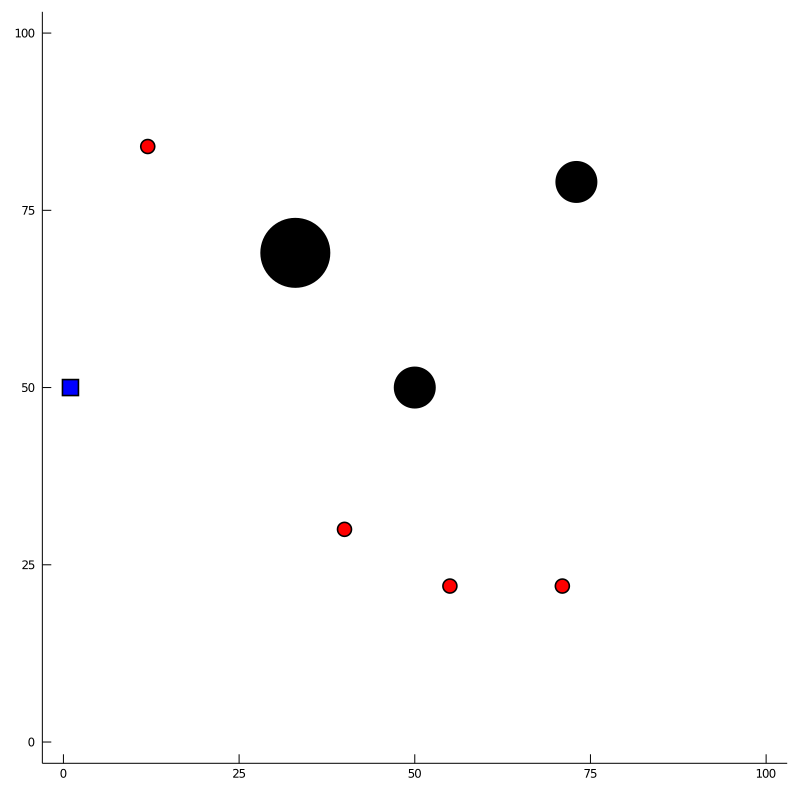

In [31]:
env

In [39]:
returned_path[1:40]

40-element Array{Any,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [59]:
path_x, path_y, path_z = [],[],[]

(Any[], Any[], Any[])